In [2]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
base = pd.read_csv('datasets/petr4_treinamento.csv')

In [5]:
base = base.dropna()
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [6]:
base_treinamento = base.iloc[: , 1:7].values

In [7]:
base_treinamento

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [8]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [36]:
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[: ,0:1])

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [9]:
base_treinamento_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [11]:
X = [] #previsores
y = [] #preço real
for i in range(90, 1242): #90 preços anteriores
    X.append(base_treinamento_normalizada[i-90: i, 0:6])
    y.append(base_treinamento_normalizada[i,0])
    
X, y = np.array(X), np.array(y)

In [13]:
X[0]

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
        0.04015963],
       [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
        0.0416214 ],
       [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
        0.03485382],
       [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
        0.02507502],
       [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
        0.0260728 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
        0.0404927 ],
       [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
        0.0423977 ],
       [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
        0.02401858],
       [0.75872098, 0

In [14]:
X.shape

(1152, 90, 6)

In [15]:
y.shape

(1152,)

In [17]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape=(X.shape[1], 6)))#x.shape[1],1 enviando 90 colunas para a rede neural, apenas a coluna com valor de abertura
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1, activation='linear'))

regressor.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,451 (443.17 KB)

 Trainable params: 113,451 (443.17 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
regressor.compile(optimizer='rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [19]:
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=True)
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='pesos.keras', monitor='loss', save_best_only=True, verbose=1)

In [20]:
regressor.fit(X, y, epochs=100, batch_size=32, callbacks=[es, rlr, mcp])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0591 - mean_absolute_error: 0.1752
Epoch 1: loss improved from inf to 0.02900, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0583 - mean_absolute_error: 0.1737 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0149 - mean_absolute_error: 0.0958
Epoch 2: loss improved from 0.02900 to 0.01395, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0148 - mean_absolute_error: 0.0957 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0122 - mean_absolute_error: 0.0855
Epoch 3: loss improved from 0.01395 to 0.01315, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0122 - mean_absolute_error: 0.0856 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0121 - mean_absolute_error: 0.0834
Epoch 4: loss improved from 0.01315 to 0.01222, saving model 

In [21]:
base_teste = pd.read_csv('datasets/petr4_teste.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [22]:
y_teste = base_teste.iloc[: , 1:2].values
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [23]:
frames = [base, base_teste]

In [24]:
frames

[            Date       Open       High        Low      Close  Adj Close  \
 0     2013-01-02  19.990000  20.209999  19.690001  19.690001  18.086271   
 1     2013-01-03  19.809999  20.400000  19.700001  20.400000  18.738441   
 2     2013-01-04  20.330000  20.620001  20.170000  20.430000  18.766001   
 3     2013-01-07  20.480000  20.670000  19.950001  20.080000  18.444506   
 4     2013-01-08  20.110001  20.230000  19.459999  19.500000  17.911745   
 ...          ...        ...        ...        ...        ...        ...   
 1240  2017-12-25  15.750000  15.750000  15.750000  15.750000  15.718563   
 1241  2017-12-26  15.750000  15.990000  15.690000  15.970000  15.938125   
 1242  2017-12-27  15.990000  16.139999  15.980000  16.049999  16.017963   
 1243  2017-12-28  16.100000  16.129999  16.000000  16.100000  16.067865   
 1244  2017-12-29  16.100000  16.100000  16.100000  16.100000  16.067865   
 
           Volume  
 0     30182600.0  
 1     30552600.0  
 2     36141000.0  
 3    

In [25]:
base_completa = pd.concat(frames)
base_completa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
17,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [28]:
base_completa = base_completa.drop(['Date'], axis =1)

In [29]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values # 1264 - 22 - 90 = 1152

In [30]:
entradas = normalizador.transform(entradas)

In [31]:
X_teste = []
for i in range(90,112):
    X_teste.append(entradas[i-90: i,0:6])
X_teste = np.array(X_teste)

In [32]:
X_teste.shape

(22, 90, 6)

In [33]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step


In [34]:
previsoes

array([[0.5761888 ],
       [0.5825473 ],
       [0.5884881 ],
       [0.5944003 ],
       [0.60019684],
       [0.60591084],
       [0.6115284 ],
       [0.616186  ],
       [0.6199924 ],
       [0.6232841 ],
       [0.62658495],
       [0.63034606],
       [0.6361804 ],
       [0.6442868 ],
       [0.65372676],
       [0.66338485],
       [0.67176026],
       [0.6797642 ],
       [0.6894345 ],
       [0.70098245],
       [0.71356654],
       [0.7249609 ]], dtype=float32)

In [37]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [38]:
previsoes

array([[16.092537],
       [16.223776],
       [16.346394],
       [16.468422],
       [16.588062],
       [16.706   ],
       [16.821945],
       [16.91808 ],
       [16.996643],
       [17.064583],
       [17.132713],
       [17.210342],
       [17.330763],
       [17.49808 ],
       [17.69292 ],
       [17.892263],
       [18.065132],
       [18.230333],
       [18.429928],
       [18.668278],
       [18.928013],
       [19.163193]], dtype=float32)

In [39]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [40]:
previsoes.mean(), y_teste.mean()

(17.384926, 17.87454563636364)

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

0.4930802592995383

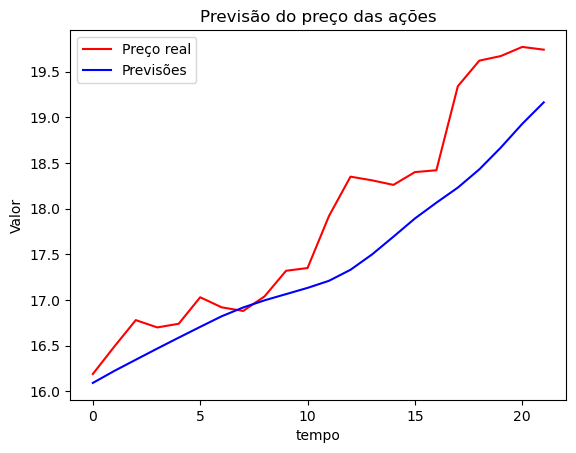

In [42]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("tempo")
plt.ylabel("Valor")
plt.legend();